<a href="https://colab.research.google.com/github/atharvaombase/CodeStorm-Web/blob/main/Data_Wrangling_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [143]:
data = {
    'StudentID': range(1, 16),
    'MathMarks': [78, 85, 2, np.nan, 88, 47, 95, 76, 58, 64, 80, 55, np.nan, 89, 73],
    'EnglishMarks': [72, 79, 85, 90, 88, 50, 94, 70, 59, 66, 82, 53, 60, 91, 75],
    'Attendance': [88, 92, 95, 85, 90, 65, 98, 84, 75, 80, 89, 70, 78, 91, 86],
    'StudyHours': [12, 15, 18, 14, 16, 5, 20, 11, 8, 9, 13, 6, 7, 17, 10]
}


In [144]:
df=pd.DataFrame(data)

In [145]:
df.head()

,StudentID,MathMarks,EnglishMarks,Attendance,StudyHours
0,1,78.0,72,88,12
1,2,85.0,79,92,15
2,3,2.0,85,95,18
3,4,NaN,90,85,14
4,5,88.0,88,90,16


In [146]:
df.isnull().sum()

,0
StudentID,0
MathMarks,2
EnglishMarks,0
Attendance,0
StudyHours,0


In [147]:
df['MathMarks'].fillna(df['MathMarks'].mean(),inplace=True)

<ipython-input-147-3d98bf02f9c9>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['MathMarks'].fillna(df['MathMarks'].mean(),inplace=True)


In [148]:
df.isnull().sum()
df.head()

,StudentID,MathMarks,EnglishMarks,Attendance,StudyHours
0,1,78.000000,72,88,12
1,2,85.000000,79,92,15
2,3,2.000000,85,95,18
3,4,68.461538,90,85,14
4,5,88.000000,88,90,16


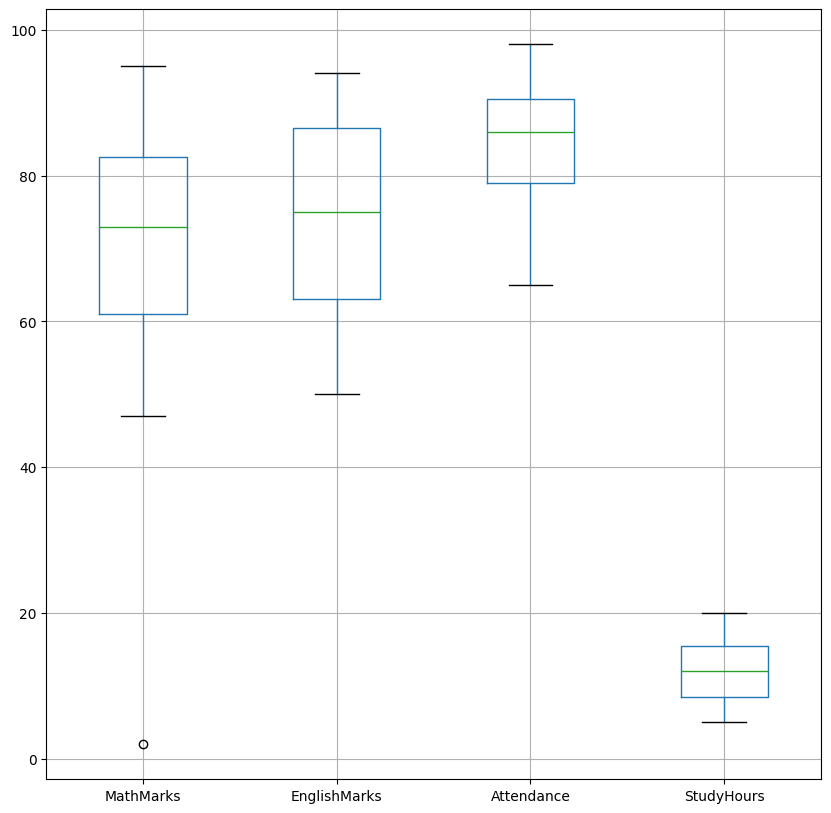

In [149]:
df[['MathMarks','EnglishMarks','Attendance','StudyHours']].boxplot(figsize=(10,10))
plt.show()

In [150]:
Q1=df['MathMarks'].quantile(0.25)
Q3=df['MathMarks'].quantile(0.75)
IQR=Q3-Q1

In [151]:
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

In [152]:
outliers=df[(df['MathMarks']<lower_bound) |( df['MathMarks']>upper_bound)]
print(outliers)

   StudentID  MathMarks  EnglishMarks  Attendance  StudyHours
2          3        2.0            85          95          18


In [153]:
df=df[(df['MathMarks']>=lower_bound) & (df['MathMarks']<=upper_bound)]

In [154]:
outliers=df[(df['MathMarks']<lower_bound) |( df['MathMarks']>upper_bound)]
print(outliers)

Empty DataFrame
Columns: [StudentID, MathMarks, EnglishMarks, Attendance, StudyHours]
Index: []


In [157]:
df['StudyHours_log']=np.log1p(df['StudyHours'])

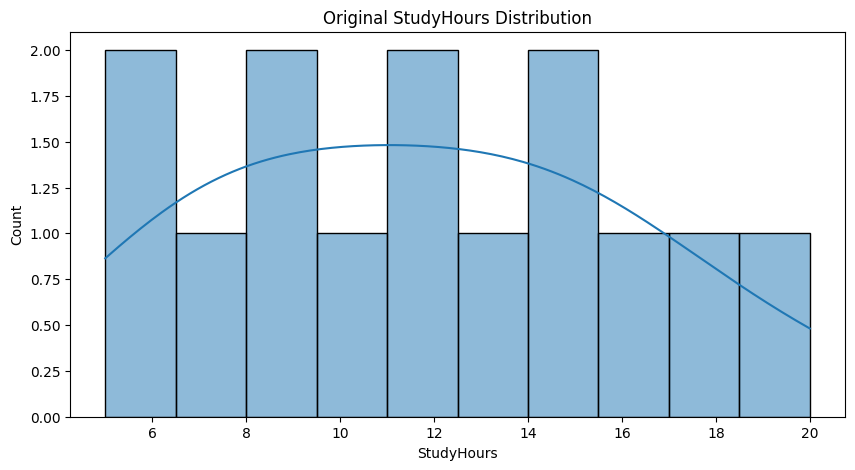

In [161]:
plt.figure(figsize=(10, 5))
sns.histplot(df['StudyHours'], bins=10, kde=True)
plt.title('Original StudyHours Distribution')
plt.show()

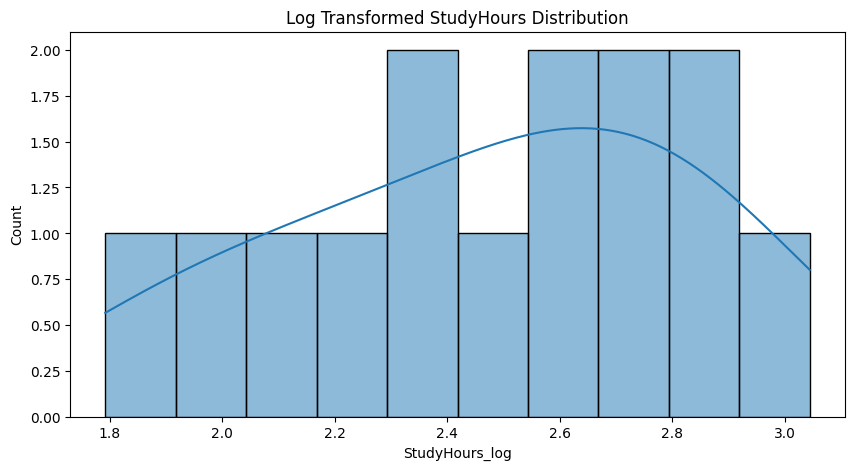

In [163]:
plt.figure(figsize=(10,5))
sns.histplot(df['StudyHours_log'],bins=10,kde=True)
plt.title('Log Transformed StudyHours Distribution')
plt.show()